
 Decision Tree Regressor Results (Titanic)
Train RMSE: 30.78572445878081
Test RMSE : 36.26296235168041
Train R²  : 0.6354223679202302
Test R²   : 0.39023993792254774


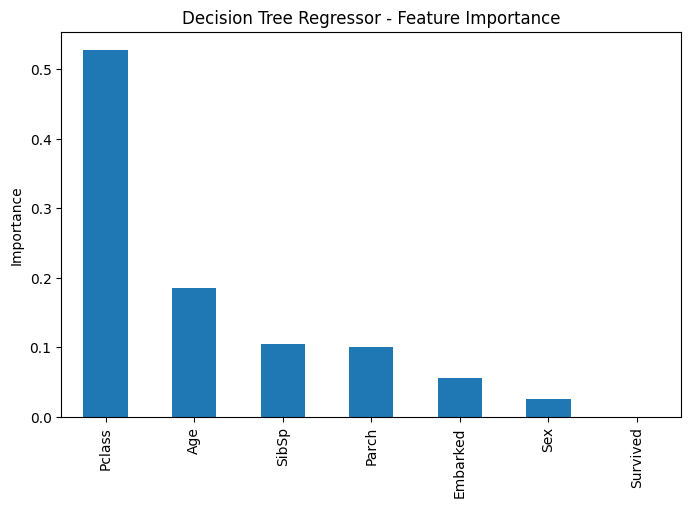

In [ ]:
#  Decision Tree Regressor with Hyperparameters (Titanic dataset, Fixed)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


# 1) Load Dataset

df = pd.read_csv("/content/titanic.csv")

# Drop irrelevant columns
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")

# Handle missing values (fixed method to avoid FutureWarning)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical variables
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])  # male=1, female=0

le_embarked = LabelEncoder()
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

# 2️) Select Features & Target
X = df.drop(columns=["Fare"])   # features
y = df["Fare"]                  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# 3️) Decision Tree Regressor with Hyperparameters
dt = DecisionTreeRegressor(
    criterion="squared_error",
    splitter="best",
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features=None,
    max_leaf_nodes=None,
    min_weight_fraction_leaf=0.0,
    random_state=42
)

dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


# 4️) Evaluation (RMSE fixed for sklearn < 0.22)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n Decision Tree Regressor Results (Titanic)")
print("Train RMSE:", train_rmse)
print("Test RMSE :", test_rmse)
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test R²   :", r2_score(y_test, y_test_pred))

# 5️) Feature Importance
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(8,5))
plt.title("Decision Tree Regressor - Feature Importance")
plt.ylabel("Importance")
plt.show()




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Check Overfitting
if r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred) > 0.2:
    print("\n Overfitting detected! Switching to Random Forest...")

    rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
        random_state=42
    )
    rf.fit(X_train, y_train)

    y_train_pred_rf = rf.predict(X_train)
    y_test_pred_rf = rf.predict(X_test)

    print("\n Random Forest Regressor Results")
    print("Train RMSE:", mean_squared_error(y_train, y_train_pred_rf) ** 0.5)
    print("Test RMSE :", mean_squared_error(y_test, y_test_pred_rf) ** 0.5)
    print("Train R²  :", r2_score(y_train, y_train_pred_rf))
    print("Test R²   :", r2_score(y_test, y_test_pred_rf))

else:
    print("\n No major overfitting detected. Comparing both models directly:")

    rf = RandomForestRegressor(
        n_estimators=200,
        random_state=42
    )
    rf.fit(X_train, y_train)

    y_test_pred_rf = rf.predict(X_test)

    print("\n Random Forest Test R² :", r2_score(y_test, y_test_pred_rf))
    print(" Random Forest Test RMSE:", mean_squared_error(y_test, y_test_pred_rf) ** 0.5)




 Overfitting detected! Switching to Random Forest...

 Random Forest Regressor Results
Train RMSE: 15.761755491088461
Test RMSE : 40.69408563860038
Train R²  : 0.9044346540962694
Test R²   : 0.23211708146415222


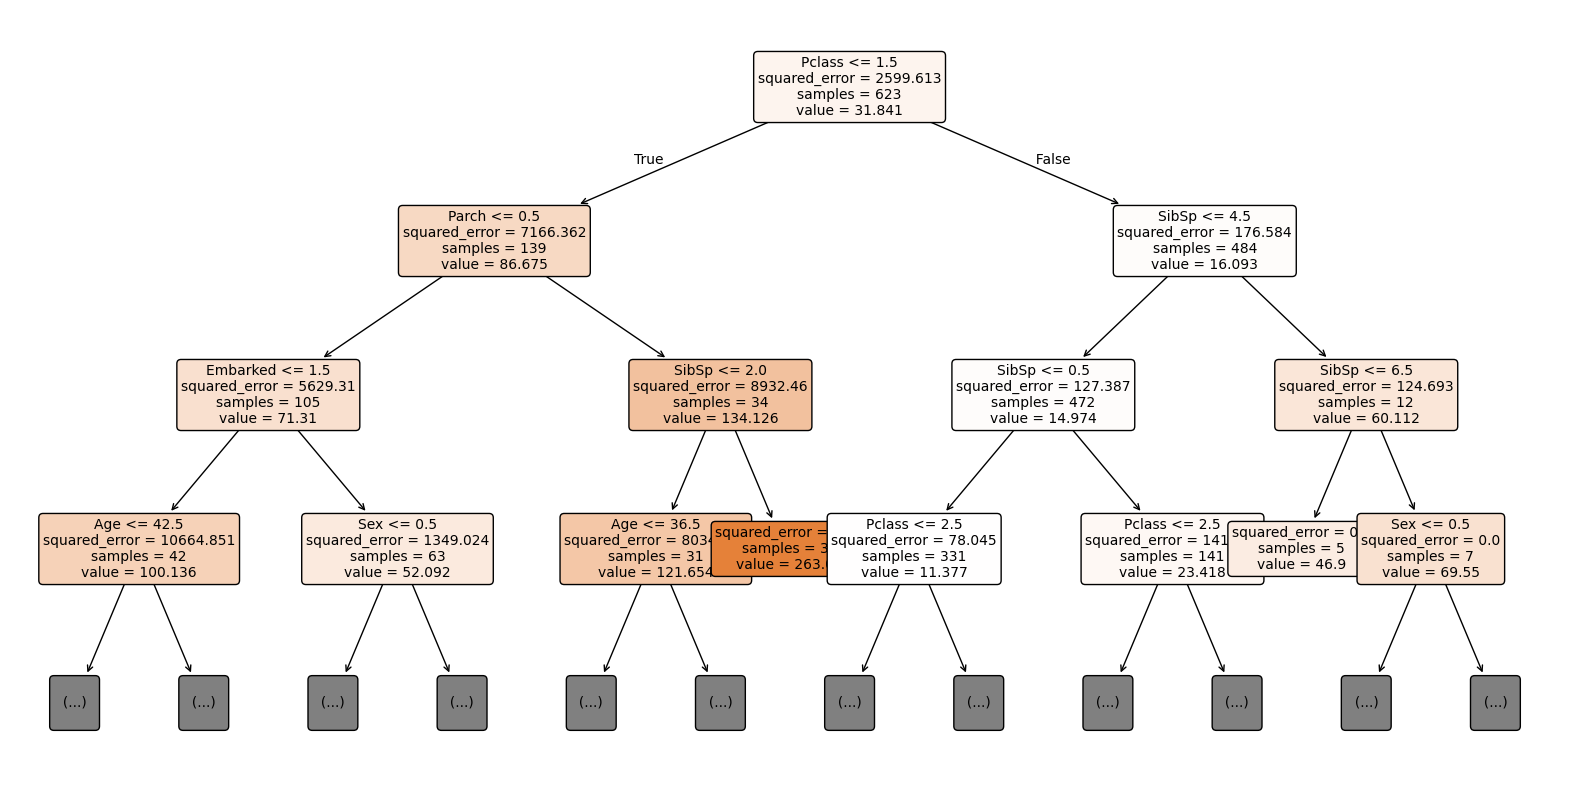

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    dt,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3   # show only top 3 levels
)
plt.show()


